# STEP #1 IMPORT LIBRARIES/DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
y_train.shape

(50000, 1)

In [4]:
y_test.shape

(10000, 1)

# STEP #2 VISUALIZE DATA

[7]


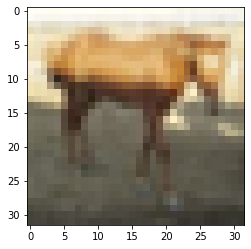

In [5]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\sonam\Anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


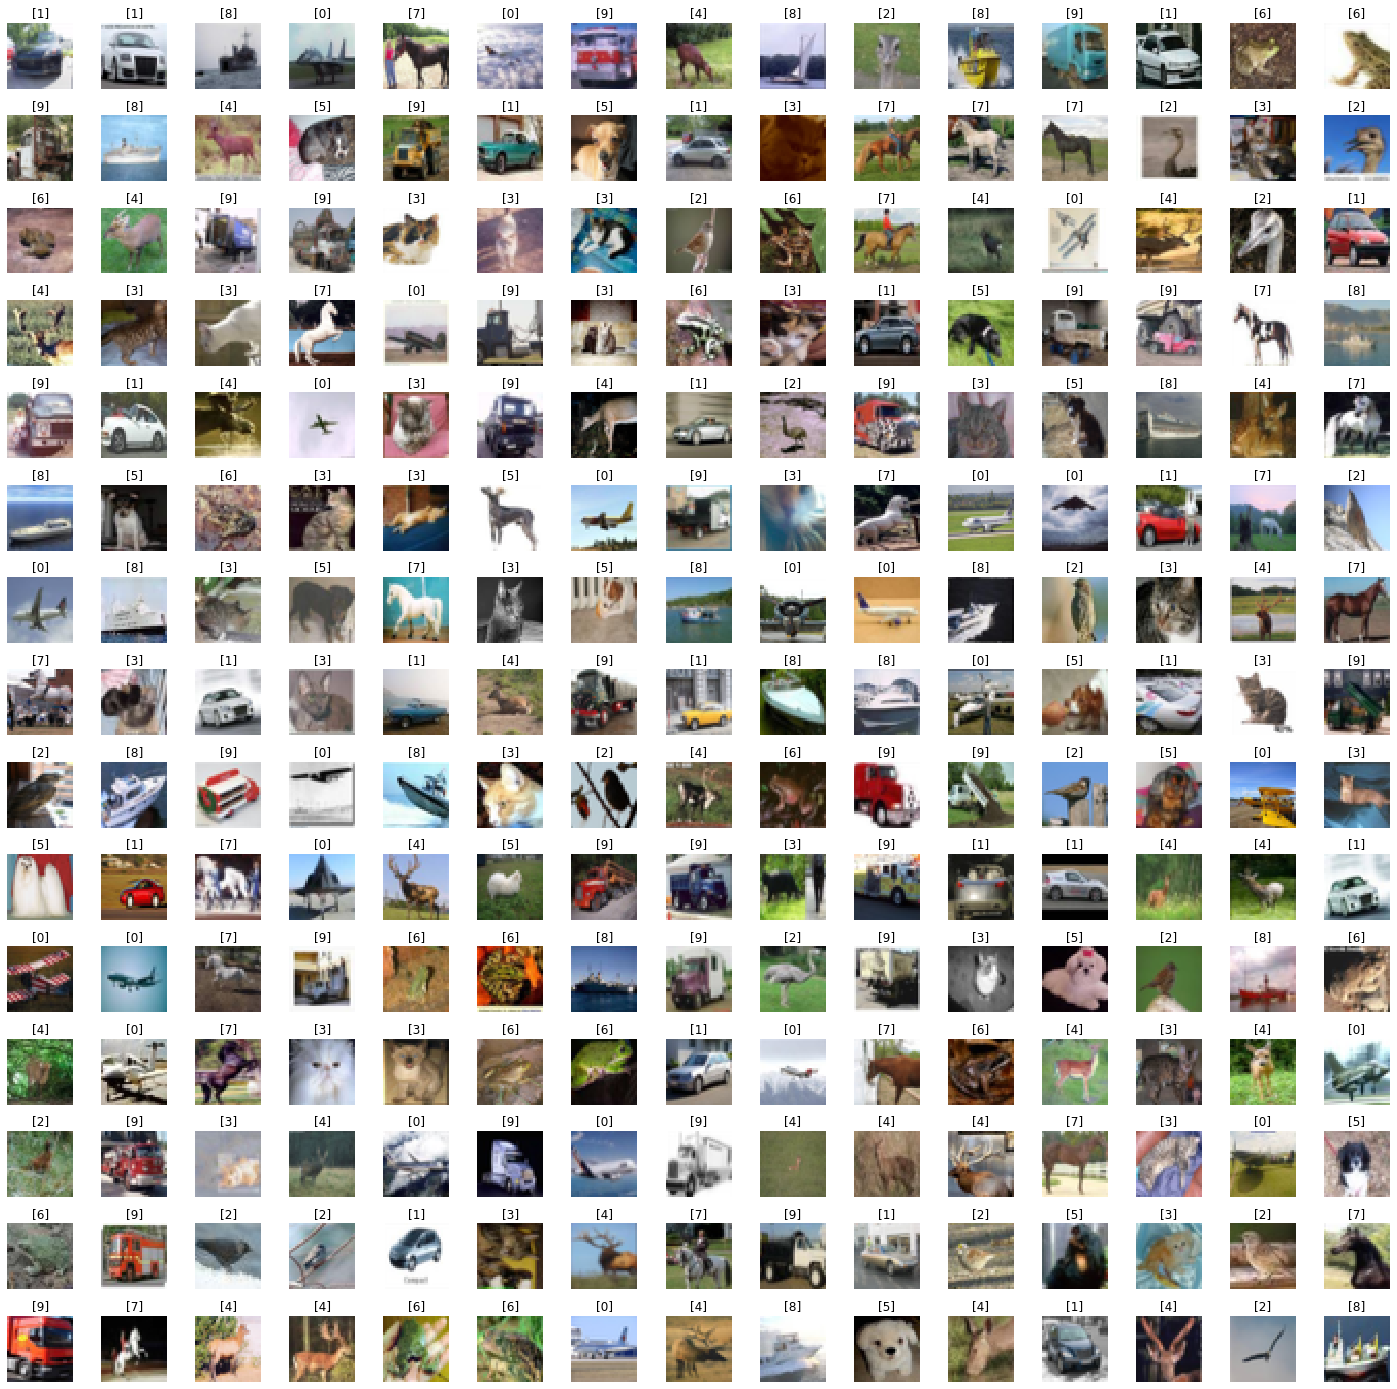

In [6]:
L_grid = 15
W_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in range(0, L_grid*W_grid):
    index = np.random.randint(0, n_training) # pick a random number between zero and length of training data
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)


# SETEP #3 DATA PREPARATION

In [7]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


In [8]:
number_cat = 10

In [9]:
import tensorflow.keras as keras

y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
input_shape = X_train.shape[1:]

In [13]:
input_shape

(32, 32, 3)

# STEP #4 TRAIN THE MODEL

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [17]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=1, shuffle=True)

Instructions for updating:
Use tf.cast instead.
50000/50000 [==============================] - 419s 8ms/sample - loss: 1.6243 - acc: 0.4132


# STEP #5 EVALUATE THE MODEL

In [18]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("My accuracy: {}".format(evaluation[1]))

10000/10000 [==============================] - 35s 3ms/sample - loss: 1.1847 - acc: 0.5845
My accuracy: 0.5845000147819519


In [19]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [20]:
y_test = y_test.argmax(1)


In [21]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

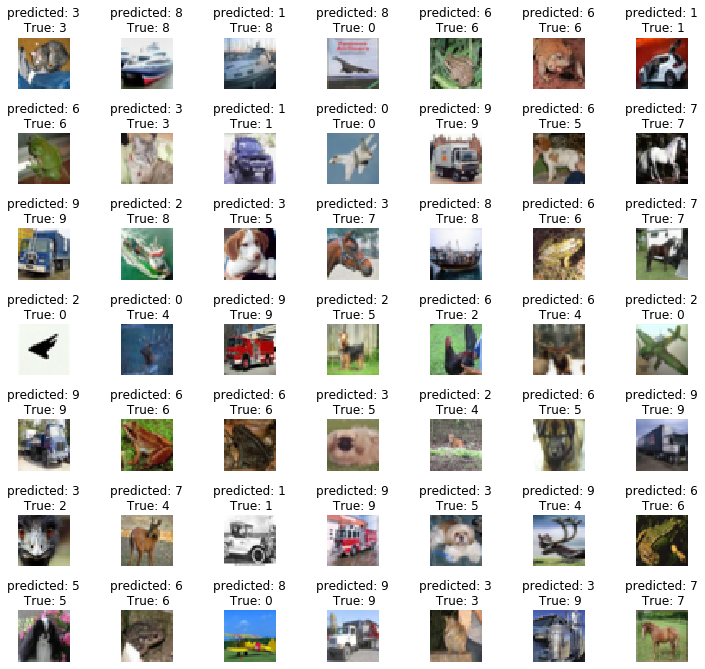

In [22]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('predicted: {}\n True: {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis("off")
plt.subplots_adjust(wspace = 1)

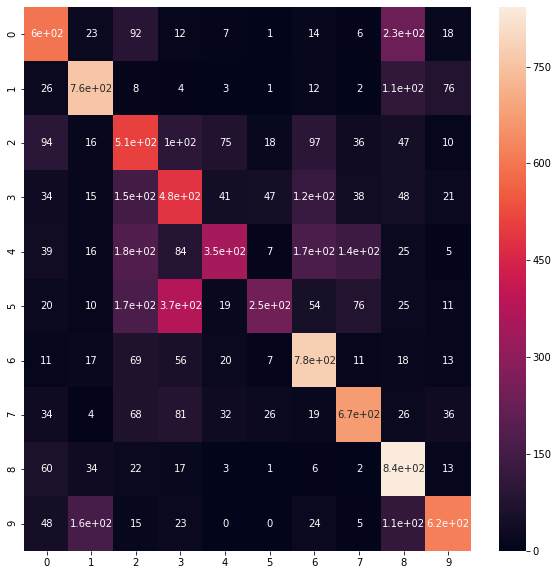

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cn = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cn, annot=True)

# STEP #6 SAVING THE MODEL

In [24]:
import os

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
    

# STEP #7.1 DATA AUGMENTATION FOR THE CIFAR10 DATASET

In [25]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [27]:
# n = 8

In [28]:
# X_train_sample = X_train[:n]
# X_train_sample.shape

In [29]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90, horizontal_flip=True, vertical_flip=True)
# dataget_train.fit(X_train_sample)

In [30]:
# from scipy.misc import toimage

# fig = plt.figure(figsize = (20,2))

# for X_batch in dataget_train.flow(X_train_sample, batch_size=n):
#     for i in range(0, n):
#         ax = fig.add_subplot(1, n, i+1)
#         ax.imshow(toimage(X_batch[i]))
#     fig.suptitle("Augmented images (rotated 90 degrees)")
#     plt.show()
#     break;

# STEP #7.2 MODEL TRAINING USING AUGMENTED DATASET

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                             rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True,
                             
)

In [32]:
datagen.fit(X_train)

In [33]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=4)

Epoch 1/4
1563/1563 [==============================] - 407s 260ms/step - loss: 1.7810 - acc: 0.3579
Epoch 2/4
1563/1563 [==============================] - 420s 269ms/step - loss: 1.6593 - acc: 0.4050
Epoch 3/4
1563/1563 [==============================] - 404s 258ms/step - loss: 1.6197 - acc: 0.4195
Epoch 4/4
1563/1563 [==============================] - 414s 265ms/step - loss: 1.5728 - acc: 0.4413


In [35]:
# Save the model after data augmentation
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
    